In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
from scipy.stats import ttest_ind
from statsmodels.stats.power import tt_ind_solve_power

# Identify Boring or Interesting – Hypothesis Testings

## Hypotheses

* Null hypothesis, $ H_0 $: the boring part, e.g., the medicine has no effect.
* Alternative hypothesis, $ H_1 $: the interesting part, e.g., the medicine saves lives!

## P-Value

<img style="float: left; width: 50%;" alt="P-value_in_statistical_significance_testing.svg" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/P-value_in_statistical_significance_testing.svg">
<div style="clear: both"></div>

* P-value:
    * The probability of making mistakes.
    * The probability we reject the null hypothesis, when it's true.
    * $ \text{p-value} = P(\text{reject }H_0 | H_0\text{: true} ) $
    * < 0.001: extremely significant.
    * < 0.01: very significant.
    * < 0.05: significant.
    * ≥ 0.05: not significant.

## T-Test

$ H_0 $: the means of two populations are equal.

In [3]:
howell1_df = pd.read_csv('dataset_howell1.csv', sep=';')
display(howell1_df.head(), howell1_df.tail(), howell1_df.shape)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


,height,weight,age,male
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062496,21.0,0
542,71.120,8.051258,0.0,1
543,158.750,52.531624,68.0,1


(544, 4)

### Men vs. Women

* $ H_0 $: men and women have the same mean of heights.
* $ H_1 $: men and women have different mean of heights.

In [4]:
df = howell1_df

In [5]:
df['height'].groupby(df.male).describe()

,count,mean,std,min,25%,50%,75%,max
male,,,,,,,,
0,287.0,134.630278,25.930233,53.975,125.2474,146.05,151.130,162.56
1,257.0,142.321037,28.871320,60.452,124.9934,157.48,161.925,179.07


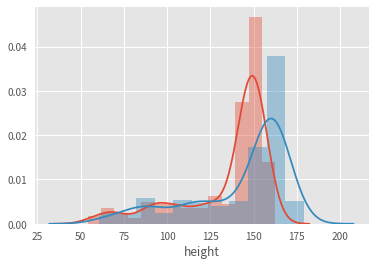

In [6]:
sns.distplot(df[df.male == 0].height)
sns.distplot(df[df.male == 1].height)

In [7]:
ttest_ind(df[df.male == 0].height, df[df.male == 1].height)

Ttest_indResult(statistic=-3.2732568510643181, pvalue=0.0011309256622558707)

### Two Random Groups

* $ H_0 $: The random groups have the same mean of heights.
* $ H_1 $: The random groups have different mean of heights.

In [8]:
df = howell1_df.copy()

In [9]:
df['randint'] = np.random.randint(2, size=len(df))

In [10]:
df['height'].groupby(df.randint).describe()

,count,mean,std,min,25%,50%,75%,max
randint,,,,,,,,
0,281.0,138.437606,27.873983,55.880,125.3998,149.2250,158.115,179.07
1,263.0,138.077678,27.361236,53.975,125.0950,148.2852,156.845,171.45


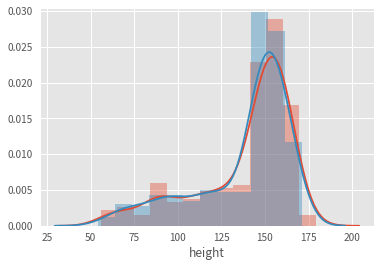

In [11]:
sns.distplot(df[df.randint == 0].height)
sns.distplot(df[df.randint == 1].height)

In [12]:
ttest_ind(df[df.randint == 0].height, df[df.randint == 1].height)

Ttest_indResult(statistic=0.15184788340284686, pvalue=0.87936341870648638)

## Power Analysis

In [13]:
# nobs2 = nobs1 * ratio

# false positive rate = type I error rate = α
# significance level = α

# confidence level = 信心水準 = γ = 1 - α

# false negative rate = type II error rate = β
# statistical power = 檢定力 = 1 - β

tt_ind_solve_power(effect_size=1, nobs1=None, alpha=0.05, power=0.8, ratio=1)

16.71472257227619

## Dig More

* [P-value – Wikipedia](https://en.wikipedia.org/wiki/P-value)
* [Student's t-test – Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test)
* [Student's t-distribution – Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
* [Choosing Between a Nonparametric Test and a Parametric Test – Minitab](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test) *[recommended]*
* [ttest_ind – SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [tt_ind_solve_power – StatsModels](http://www.statsmodels.org/dev/generated/statsmodels.stats.power.tt_ind_solve_power.html)